In [1]:
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas
import numpy as np

In [2]:
from lib.lbGraficas import cargaDataSet
from lib.lbGraficas import showGraficaCont
from lib.lbClima import cargaDfClima
from lib.lbClima import quitarHora
from lib.lbVarios import series_to_supervised
from lib.lbCargaDatosNorm import cargaDatosSep
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
from os import path
import numpy
import pandas

Using TensorFlow backend.


In [3]:
""" -------------------- load dataset CONTAMINACION -------------------- """
dataset14 = cargaDataSet("datos/datosContaminacion/datos2014_DatosDiarios.txt") #datos 2014
dataset15 = cargaDataSet("datos/datosContaminacion/datos2015_DatosDiarios.txt") #datos 2015
dataset16 = cargaDataSet("datos/datosContaminacion/datos2016_DatosDiarios.txt") #datos 2016
#dataset = pandas.concat([dataset15,dataset16])
#dataset = pandas.concat([dataset14,dataset15,dataset16])
#print(dataset.head())
print(dataset15.shape)
print(dataset16.shape)
#Para 2017 y 2018 cambia el formato del txt, entonces lo cogemos en csv ya directamente
dataset17 = pandas.read_csv('datos/datosContaminacion/datos17.csv',sep=';')
df17 = dataset17.drop(['V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31'], axis=1)
df17['Tecnica']='00'
df17['Periodo_Analisis']='04'
df17Filtrado = df17.loc[df17['ESTACION'] == 4]
df17Filtrado['ESTACION']='28079004'
dataset17 = df17Filtrado[['ESTACION','MAGNITUD','Tecnica','Periodo_Analisis','ANO','MES','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']]
#dataset17 = df17Filtrado.loc['ESTACION','MAGNITUD','Tecnica','Periodo_Analisis','ANO','MES','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']
dataset17.columns = ['Estacion','Magnitud','Tecnica','Periodo_Analisis','Año','Mes',"Dia1","Dia2","Dia3","Dia4","Dia5","Dia6","Dia7","Dia8","Dia9","Dia10","Dia11","Dia12","Dia13","Dia14","Dia15","Dia16","Dia17","Dia18","Dia19","Dia20","Dia21","Dia22","Dia23","Dia24","Dia25","Dia26","Dia27","Dia28","Dia29","Dia30","Dia31"]
print(dataset17.shape)

dataset18 = pandas.read_csv('datos/datosContaminacion/datos18.csv',sep=';')
df18 = dataset18.drop(['V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31'], axis=1)
df18['Tecnica']='00'
df18['Periodo_Analisis']='04'
df18Filtrado = df18.loc[df18['ESTACION'] == 4]
df18Filtrado['ESTACION']='28079004'
dataset18 = df18Filtrado[['ESTACION','MAGNITUD','Tecnica','Periodo_Analisis','ANO','MES','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']]
#dataset18 = df18Filtrado.loc['ESTACION','MAGNITUD','Tecnica','Periodo_Analisis','ANO','MES','D01','D02','D03','D04','D05','D06','D07','D08','D09','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','D31']
dataset18.columns = ['Estacion','Magnitud','Tecnica','Periodo_Analisis','Año','Mes',"Dia1","Dia2","Dia3","Dia4","Dia5","Dia6","Dia7","Dia8","Dia9","Dia10","Dia11","Dia12","Dia13","Dia14","Dia15","Dia16","Dia17","Dia18","Dia19","Dia20","Dia21","Dia22","Dia23","Dia24","Dia25","Dia26","Dia27","Dia28","Dia29","Dia30","Dia31"]
print(dataset18.shape)

(1488, 37)
(1488, 37)
(60, 37)
(20, 37)


/home/adiaz/.conda/envs/meteo/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/adiaz/.conda/envs/meteo/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
dataset = pandas.concat([dataset14,dataset15,dataset16,dataset17,dataset18])
print(dataset.shape)
plzEspana = "28079004"
print("ahora filtramos y colocamos todos los días en orden")
values08 = showGraficaCont(dataset,plzEspana,"08",False) #valor de NO2 en cada día
values8 = showGraficaCont(dataset,plzEspana,"8",True) #valor de NO2 en cada día
values01 = showGraficaCont(dataset,plzEspana,"01",False) #valor de SO2 en cada día
values1 = showGraficaCont(dataset,plzEspana,"1",True) #valor de SO2 en cada día
values06 = showGraficaCont(dataset,plzEspana,"06",False) #valor de CO en cada día
values6 = showGraficaCont(dataset,plzEspana,"6",True) #valor de CO en cada día
print("Número de valores de 08: " + str(len(values08)) + " Y número de valores de 8: " + str(len(values8)))
print("Número de valores de 01: " + str(len(values01)) + " Y número de valores de 1: " + str(len(values1)))
print("Número de valores de 06: " + str(len(values06)) + " Y número de valores de 6: " + str(len(values6)))
values08 = values08 + values8
values01 = values01 + values1
values06 = values06 + values6
print("Valor final de los conjuntos de valores 08,01 y 06:")
print(len(values08))
print(len(values01))
print(len(values06))

(4535, 37)
ahora filtramos y colocamos todos los días en orden
Número de valores de 08: 1096 Y número de valores de 8: 485
Número de valores de 01: 1096 Y número de valores de 1: 485
Número de valores de 06: 1096 Y número de valores de 6: 485
Valor final de los conjuntos de valores 08,01 y 06:
1581
1581
1581


In [5]:
rutaArchivosClima = 'datos/datosAemet14151617Abril18'
cabecerasClima = ['Estación','Provincia','Temperatura máxima (ºC)','Temperatura mínima (ºC)','Temperatura media (ºC)','Racha (km/h)','Velocidad máxima (km/h)','Precipitación 00-24h (mm)','Precipitación 00-06h (mm)','Precipitación 06-12h (mm)','Precipitación 12-18h (mm)','Precipitación 18-24h (mm)']
#dfClima = cargaDfClima(rutaArchivosClima,cabecerasClima,'Madrid, Retiro')
dfClima = cargaDfClima(rutaArchivosClima,cabecerasClima,'Madrid, Ciudad Universitaria')
#print(dfClima.head())
print(dfClima.shape)

(1581, 12)


In [6]:
""" ---------- Construimos el dataset con los valores que queremos predecir ---------- """
valuesFinal= numpy.zeros((1,dfClima.shape[1]+1)) ##valuesFinal= numpy.zeros((1,13))
#dfClima = dfClima.fillna(0) #rellena con 0 los nulos - Cambiar a que coja lo del día de antes o después
#controlar que no haya nulos el primer dia
#Para poner el valor medio: df['A'].fillna(df['A'].median())
#Para limitarlo a que se haga en los primeros: df = df.fillna(value='missing', method='bfill', limit=1)
dfClima = dfClima.fillna(method='ffill') #rellena los nulos con el valor del día de antes
matrizClima = dfClima.reset_index().values
print(matrizClima.shape)
print(len(values08))
for i in range (0,len(values08),1):  
    newValueArr=numpy.array([[values08[i], values01[i], values06[i], quitarHora(matrizClima[i][3]), quitarHora(matrizClima[i][4]), matrizClima[i][5], quitarHora(matrizClima[i][6]), quitarHora(matrizClima[i][7]), matrizClima[i][8], matrizClima[i][9], matrizClima[i][10], matrizClima[i][11], matrizClima[i][12]]]).astype(float)     
    valuesFinal=numpy.append(valuesFinal, newValueArr, axis = 0)
print(valuesFinal[0])
valuesFinal = numpy.delete(valuesFinal, 0, axis=0) #Eliminamos el primero que inicializamos
print(valuesFinal[0])
print(len(valuesFinal))
#print(valuesFinal[730])
#print(valuesFinal[731])
print('===...===')
numpy.nan_to_num(valuesFinal,copy=False)
print(valuesFinal[0])
print('======')
#print(values08[730])
#print(values08[731])
print(values08[0])

(1581, 13)
1581
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 30.    4.    0.3  33.6  15.9  24.7  37.   18.    0.    0.    0.    0.
   0. ]
1581
===...===
[ 30.    4.    0.3  33.6  15.9  24.7  37.   18.    0.    0.    0.    0.
   0. ]
30.0


In [7]:
""" -------------------- normalize features -------------------- """
#Hay que normalizar la matriz resultante para ello usamos MinMaxScaler() y scaler()
#scaler (son los valores normalizados) necesita el formato => Filas = Dias, Columnas = ValorCadaCosaQueMide
scaler_VF = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(valuesFinal)
scaler_fit = scaler_VF.fit(valuesFinal)
scaler_tra = scaler_VF.transform(valuesFinal)
scaled = scaler_tra
print(scaled.shape) #sera 366 + 365
print(scaled[0])
print('------')
print(scaled[1])
print('------')
print(scaled[2])

(1581, 13)
[ 0.20588235  0.15        0.15384615  0.80519481  0.69607843  0.75
  0.33663366  0.40909091  0.          0.          0.          0.          0.        ]
------
[ 0.26470588  0.15        0.15384615  0.24675325  0.36928105  0.27134146
  0.33663366  0.40909091  0.19537275  0.35555556  0.03813559  0.13768116
  0.        ]
------
[ 0.2745098   0.15        0.15384615  0.24675325  0.36928105  0.27134146
  0.33663366  0.40909091  0.19537275  0.          0.          0.13768116
  0.        ]


In [8]:
#series = pandas.read_csv('EjemploContaminacion.csv', header=0)
series = scaled

In [9]:
#model = VAR(series.values)
n_train_days = round(1446)
train = numpy.array(scaled[:n_train_days])
test = numpy.array(scaled[n_train_days:])

model = VAR(train)
model = model.fit()

In [10]:
"""trPred = model.forecast(test[0:14],steps=1)
for i in range(primer_dia,primer_dia+dias):
    real = test[i,variable_predicha]
    todasVarPred = model.forecast(test[0:14+i],steps=1)
    predicho = todasVarPred[0]
    #print('predicho: ',predicho)
    #print('predicho: ',predicho[0:0])
    error += abs(real-predicho[0])
    lista_real.append(real)
    lista_obtenido.append(predicho[0])
print('predicho: ',predicho[0])
p = predicho[0]
print(p)"""

"trPred = model.forecast(test[0:14],steps=1)\nfor i in range(primer_dia,primer_dia+dias):\n    real = test[i,variable_predicha]\n    todasVarPred = model.forecast(test[0:14+i],steps=1)\n    predicho = todasVarPred[0]\n    #print('predicho: ',predicho)\n    #print('predicho: ',predicho[0:0])\n    error += abs(real-predicho[0])\n    lista_real.append(real)\n    lista_obtenido.append(predicho[0])\nprint('predicho: ',predicho[0])\np = predicho[0]\nprint(p)"

<class 'numpy.ndarray'>
El error medio es:  0.0966281593799


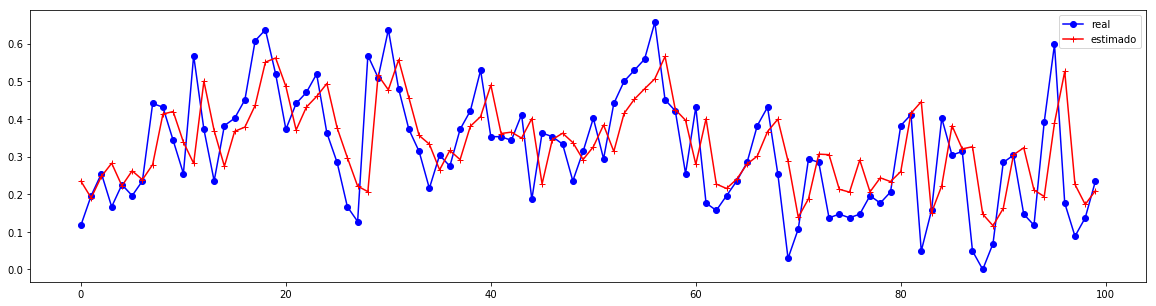

In [11]:
lista_obtenido = []
lista_real = []
dias = 100
primer_dia = 0
variable_predicha = 0
error = 0
desv = []

newPred = model.forecast(test[0:14],steps=dias)

for i in range(primer_dia,primer_dia+dias):
    real = test[i+15,variable_predicha]
    todasVarPred = model.forecast(test[i:15+i],steps=1)
    predicho = todasVarPred[0]
    #predicho = model.forecast(test[0:14+i],steps=1)
    #print('predicho: ',predicho)
    #print('predicho: ',predicho[0:0])
    error += abs(real-predicho[0])
    desv.append(abs(real-predicho[0]))
    lista_real.append(real)
    lista_obtenido.append(predicho[0])

print(type(newPred))

##print(newPred[1:2].tolist())
#print('====')
#print(newPred[1:2])
print("El error medio es: ", error / dias)
    
import matplotlib.pyplot as plt
grp = plt.figure(figsize=(20,5))
plt.plot(lista_real,"o-",color="blue",label="real")
plt.plot(lista_obtenido,"+-",color="red",label="estimado")
plt.legend()
plt.show()

In [12]:
print('Desviación típica: ',numpy.std(desv))

Desviación típica:  0.0805210511916
